In [2]:
import numpy as np 
from sklearn.decomposition import PCA
import pandas as pd
df = pd.read_csv("fer2013.csv") 

X = df['pixels'].values

X = np.array([np.fromstring(x, sep=' ') for x in X])


In [3]:
Y = df['emotion'].values
Y

array([0, 0, 2, ..., 0, 3, 2], dtype=int64)

In [4]:
X.shape

(35887, 2304)

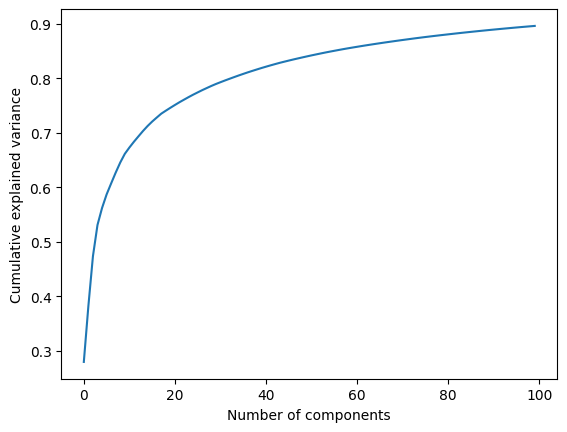

In [5]:
import matplotlib.pyplot as plt
# Create PCA model
pca = PCA(n_components=100) 

# Fit PCA model on data
pca.fit(X[Y == 0]) # for class 0

X_reduced = pca.transform(X)

# Plot variance explained 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

eigenfaces = pca.components_


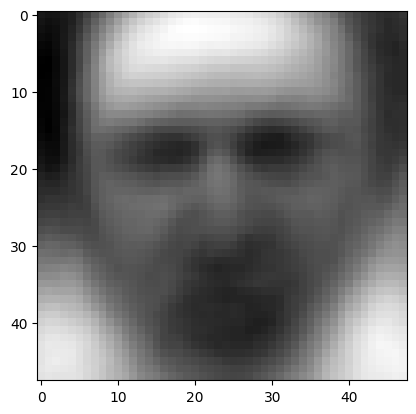

In [6]:
plt.imshow(eigenfaces[4].reshape(48, 48), cmap='gray') 

In [7]:
import pandas as pd

df = pd.read_csv("fer2013.csv")

mask_train = df['Usage'] == 'Training'

X_train = df[mask_train]['pixels'].values
X_test = df[~mask_train]['pixels'].values

X_train = np.array([np.fromstring(x, sep=' ') for x in X_train])
X_test = np.array([np.fromstring(x, sep=' ') for x in X_test])

y_train = df[mask_train]['emotion'].values
y_test = df[~mask_train]['emotion'].values

In [8]:
pca = PCA(n_components=100) 
pca.fit(X)

PCA(n_components=100)

In [9]:
# Part c)
# K = 1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# KNN on original data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
print("Confusion matrix (original):")
print(confusion_matrix(y_test, y_pred))
print("Accuracy (original):", accuracy_score(y_test, y_pred))

# KNN on PCA reduced data
X_reduced = pca.transform(X_train)
knn.fit(X_reduced, y_train)
y_pred = knn.predict(pca.transform(X_test))
print("\nConfusion matrix (reduced):") 
print(confusion_matrix(y_test, y_pred))
print("Accuracy (reduced):", accuracy_score(y_test, y_pred))



Confusion matrix (original):
[[294  21 107 164 124  51 197]
 [  8  66   3   7  12   2  13]
 [102   7 397 145 134  65 174]
 [145  24 162 715 209  79 440]
 [129  32 139 239 396  41 271]
 [ 43   8  54  94  42 505  85]
 [ 99  17 122 232 180  60 523]]
Accuracy (original): 0.4034550013931457

Confusion matrix (reduced):
[[321  18 103 172 110  54 180]
 [  6  68   4   8  11   2  12]
 [100   7 400 148 146  71 152]
 [161  26 157 757 204 102 367]
 [123  34 144 239 401  53 253]
 [ 49   6  65  84  39 520  68]
 [112  16 117 247 171  73 497]]
Accuracy (reduced): 0.41292839230983563


In [10]:
# K = 2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
print("Confusion matrix (original):")
print(confusion_matrix(y_test, y_pred))
print("Accuracy (original):", accuracy_score(y_test, y_pred))

# KNN on PCA reduced data
X_reduced = pca.transform(X_train)
knn.fit(X_reduced, y_train)
y_pred = knn.predict(pca.transform(X_test))
print("\nConfusion matrix (reduced):") 
print(confusion_matrix(y_test, y_pred))
print("Accuracy (reduced):", accuracy_score(y_test, y_pred))


Confusion matrix (original):
[[363  28 166 209  89  34  69]
 [ 21  61   8   7   5   3   6]
 [190  25 426 190  95  50  48]
 [296  47 258 802 173  71 127]
 [254  48 223 326 277  29  90]
 [ 95  18 124 140  78 353  23]
 [198  29 188 363 156  51 248]]
Accuracy (original): 0.35246586792978546

Confusion matrix (reduced):
[[401  23 147 214  84  34  55]
 [ 17  64   4  13   5   3   5]
 [200  15 441 183  95  46  44]
 [312  52 280 815 139  63 113]
 [269  41 229 330 264  29  85]
 [107  10 128 141  69 358  18]
 [226  32 198 332 160  58 227]]
Accuracy (reduced): 0.35803845082195596


Text(0.5, 1.0, 'Accuracy vs Number of Components')

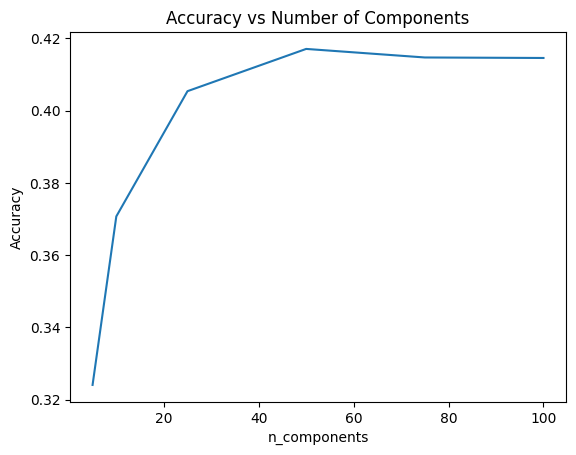

In [11]:
# Part d)
n_components = [5, 10, 25, 50, 75, 100]
accuracies = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_reduced = pca.transform(X_train)
    
    knn = KNeighborsClassifier(n_neighbors=1) 
    knn.fit(X_reduced, y_train)
    
    acc = knn.score(pca.transform(X_test), y_test)
    accuracies.append(acc)

plt.plot(n_components, accuracies)
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')